<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          25 non-null     object 
 1   Sales             25 non-null     float64
 2   Profit            25 non-null     float64
 3   Region            25 non-null     object 
 4   Product Category  25 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.1+ KB

First 5 rows of the dataset:


,Order ID,Sales,Profit,Region,Product Category
0,GS10001,250.75,45.10,North America,Furniture
1,GS10002,120.50,30.00,Europe,Technology
2,GS10003,89.99,12.45,Asia,Office Supplies
3,GS10004,560.00,100.00,South America,Furniture
4,GS10005,340.20,70.40,Europe,Technology



Statistical Summary:


,Sales,Profit
count,25.000000,25.000000
mean,263.869600,48.818000
std,138.736875,27.749155
min,75.500000,10.000000
25%,130.750000,25.000000
50%,260.300000,45.100000
75%,340.200000,70.000000
max,560.000000,100.000000



Missing values before cleaning:



Order ID            0
Sales               0
Profit              0
Region              0
Product Category    0
dtype: int64

Number of duplicate rows: 0

Missing values after cleaning:



Order ID            0
Sales               0
Profit              0
Region              0
Product Category    0
dtype: int64

Original shape:


(25, 7)

Cleaned shape:


(25, 7)


Statistical Summary:


,Sales,Profit,Sales_zscore,Profit_zscore
count,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,263.869600,48.818000,3.996803e-17,-2.020606e-16
std,138.736875,27.749155,1.020621e+00,1.020621e+00
min,75.500000,10.000000,-1.385745e+00,-1.427736e+00
25%,130.750000,25.000000,-9.792971e-01,-8.760319e-01
50%,260.300000,45.100000,-2.625984e-02,-1.367490e-01
75%,340.200000,70.000000,5.615262e-01,7.790792e-01
max,560.000000,100.000000,2.178489e+00,1.882487e+00


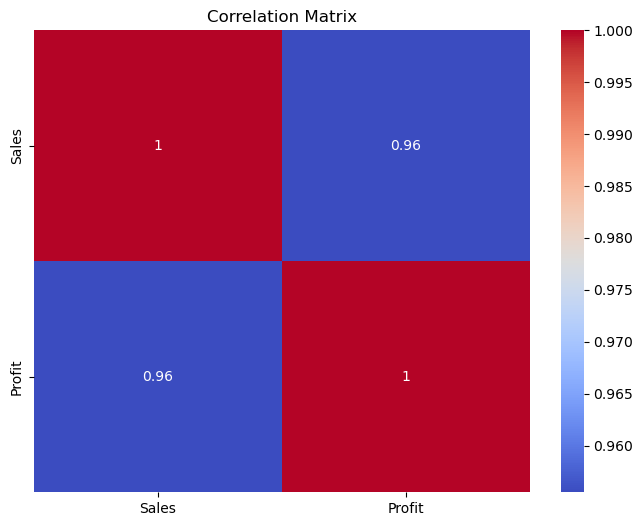

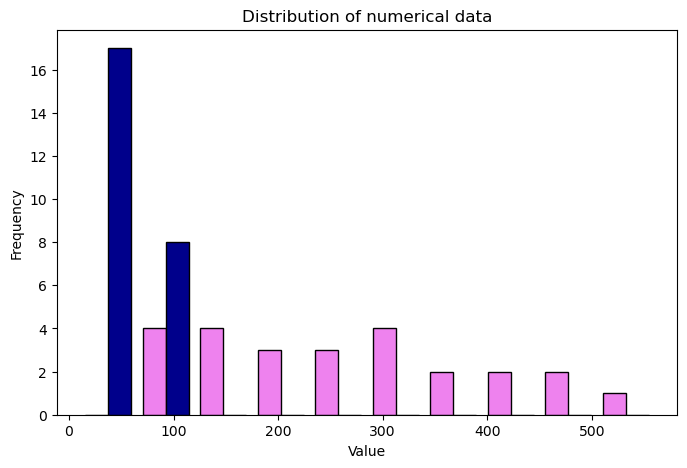

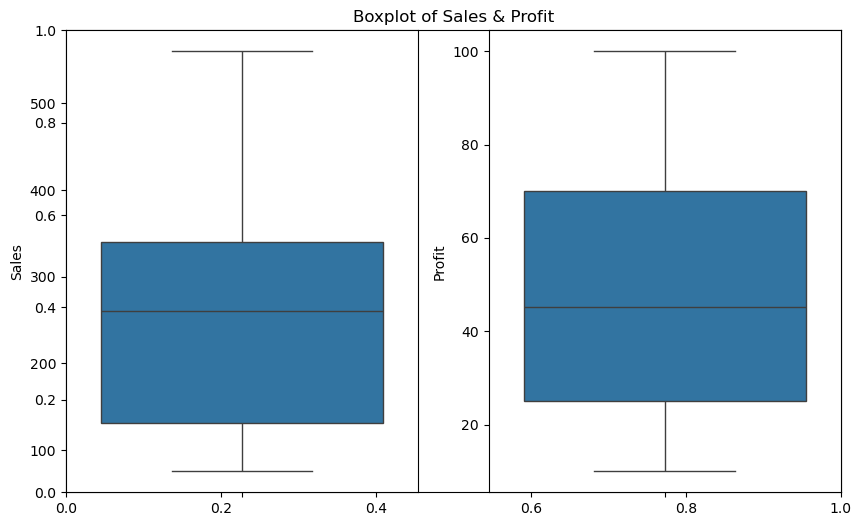

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mlt
import seaborn as sns

from scipy.stats import zscore

data = pd.read_csv("Global_Superstore.csv")
data.info()

print("\nFirst 5 rows of the dataset:")
display(data.head())

print("\nStatistical Summary:")
display(data.describe())

print("\nMissing values before cleaning:\n")
display(data.isnull().sum())

data['Sales'] = data['Sales'].fillna(data['Sales'].mean())
data['Profit'] = data['Profit'].fillna(data['Profit'].mean())

data['Profit'] = data['Profit'].fillna(data['Profit'].median())
data['Sales'] = data['Sales'].fillna(data['Sales'].median())

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()

print("\nMissing values after cleaning:\n")
display(data.isnull().sum())

#Detect and handle outliers (using Z-scores)
data['Sales_zscore'] = zscore(data['Sales'])
data['Profit_zscore'] = zscore(data['Profit'])
dataset = data[(data['Sales_zscore'].abs() < 3) & (data['Profit_zscore'].abs() < 3)]

print("Original shape:")
display(data.shape)
print("Cleaned shape:")
display(dataset.shape)

print("\nStatistical Summary:")
display(data.describe())

#Heatmap for correlations
corr_data = data[['Sales','Profit']]
mlt.figure(figsize = (8,6))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm")
mlt.title("Correlation Matrix")
mlt.show()

#Histograms to explore distributions of numerical data 
mlt.figure(figsize = (8,5))
mlt.hist(data[['Sales','Profit']] ,bins = 10, color = ['Violet', 'Darkblue'],edgecolor = 'black')
mlt.title("Distribution of numerical data")
mlt.xlabel('Value')
mlt.ylabel('Frequency')
mlt.show()

#Boxplots to identify outliers in continuous variable 
mlt.figure(figsize = (10, 6))
mlt.title("Boxplot of Sales & Profit")
mlt.subplot(1,2,1)
sns.boxplot(y = data['Sales'])
mlt.subplot(1,2,2)
sns.boxplot(y = data['Profit'])
mlt.show()